In [320]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [321]:
import numpy as np
import scipy as sp
import sklearn as sk
import cartopy as cp
import xarray as xr
import pandas as pd
import cftime
import dateutil
import dask
#Use the 2 lines below if the notebook has a dark theme (to make labelling visible):
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
#The following code resets the default plot size so you don't have to fiddle with figsize every time"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [322]:
#Need the following line to avoid hdf5 issues that prevent opening thee file
# https://stackoverflow.com/questions/49317927/errno-101-netcdf-hdf-error-when-opening-netcdf-file
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [323]:
#Load AIRI data 
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dataset_file = "pALLIN.nc"
airi_dat = xr.open_dataset(dataset_file, decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
#This file's calendar isn't recognized when using xr.open_dataset. The above workaround is from: 
#https://stackoverflow.com/questions/55648630/how-to-decode-the-time-variable-while-using-xarray-to-load-a-netcdf-file
# "M" means "month end frequency" (see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [324]:
airi_dat

<xarray.Dataset>
Dimensions:  (time: 1752)
Coordinates:
  * time     (time) datetime64[ns] 1871-02-01 1871-03-01 ... 2017-01-01
Data variables:
    precip   (time) float32 ...
Attributes:
    title:        
    description:  All-India Rainfall
    scripturl01:  https://climexp.knmi.nl/getindices.cgi?STATION=All-India_Ra...
    comment:      
    institution:  KNMI Climate Explorer
    scripturl02:  https://climexp.knmi.nl/dat2nc.cgi?id=$id&station=All-India...
    history:       2020-04-02  2:43:20 bin/dat2nc data/pALLIN.dat p All-India...
    Conventions:  CF-1.0

In [325]:
precip = airi_dat['precip']

In [326]:
#Load SST data
dataset_url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [327]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anomfull = sst_subset.groupby("time.month")-sst_clim
sst_anomfull

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1752, lat: 89, lon: 180)>
array([[[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       ...,

       [[3.152323e-02, 2.609873e-02, ..., 2.140296e-02, 3.102016e-02],
        [2.697122e-02, 1.542413e-02, ..., 1.046002e-02, 2.427316e-02],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-

In [328]:
sst_subset1 = sst_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
sst_subset2 = sst_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
sst_subset3 = sst_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
sst_subset4 = sst_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
sst_subset5 = sst_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
sst_subset6 = sst_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
sst_subset7 = sst_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
sst_subset8 = sst_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
sst_subset9 = sst_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
sst_subset10 = sst_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
sst_subset11 = sst_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
sst_subset12 = sst_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
sst_subset14 = sst_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
sst_subset15 = sst_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
sst_subset16 = sst_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
sst_subset17 = sst_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
sst_subset18 = sst_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
sst_subset19 = sst_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
sst_subset20 = sst_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
sst_subset21 = sst_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
sst_subset22 = sst_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
sst_subset23 = sst_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

sst_anomtemp = xr.merge([sst_subset1, sst_subset2, sst_subset3, sst_subset4, sst_subset5, 
                   sst_subset6, sst_subset7, sst_subset8, sst_subset9, sst_subset10, 
                   sst_subset11, sst_subset12, sst_subset13, sst_subset14, sst_subset15, 
                   sst_subset16, sst_subset17, sst_subset18, sst_subset19, sst_subset20, 
                   sst_subset21, sst_subset22, sst_subset23])
#sst_anom = xr.Dataset.to_array(sst_anomtemp).drop('variable')
print(sst_anomtemp)
sst_anom = sst_anomtemp['sst']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    sst      (time, lat, lon) float32 1.7881393e-06 1.7881393e-06 ... nan nan


In [329]:
from cartopy import config
import cartopy.crs as ccrs

from matplotlib import pyplot
import matplotlib.patches as mpatches

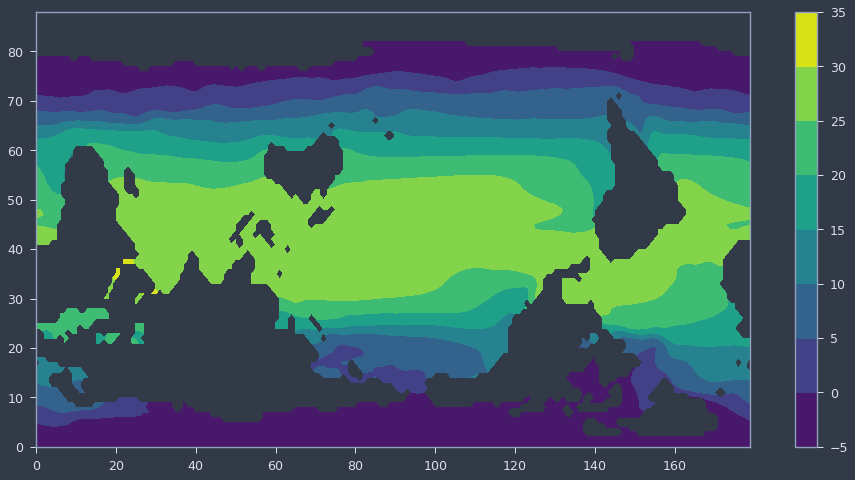

In [330]:
#Test plot of sst_clim
plt.contourf(sst_clim.sel(month=6))
plt.colorbar()

In [331]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anomfull = precip.groupby("time.month") - precip_clim


In [332]:
precip_subset1 = precip_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
precip_subset2 = precip_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
precip_subset3 = precip_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
precip_subset4 = precip_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
precip_subset5 = precip_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
precip_subset6 = precip_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
precip_subset7 = precip_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
precip_subset8 = precip_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
precip_subset9 = precip_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
precip_subset10 = precip_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
precip_subset11 = precip_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
precip_subset12 = precip_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
precip_subset14 = precip_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
precip_subset15 = precip_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
precip_subset16 = precip_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
precip_subset17 = precip_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
precip_subset18 = precip_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
precip_subset19 = precip_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
precip_subset20 = precip_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
precip_subset21 = precip_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
precip_subset22 = precip_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
precip_subset23 = precip_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

precip_anom = xr.merge([precip_subset1, precip_subset2, precip_subset3, precip_subset4, precip_subset5, 
                   precip_subset6, precip_subset7, precip_subset8, precip_subset9, precip_subset10, 
                   precip_subset11, precip_subset12, precip_subset13, precip_subset14, precip_subset15, 
                   precip_subset16, precip_subset17, precip_subset18, precip_subset19, precip_subset20, 
                   precip_subset21, precip_subset22, precip_subset23])
precip_anomtemp = xr.Dataset.to_array(precip_anom)
precip_anom = precip_anom['precip']
print(precip_anom)
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.DataArray 'precip' (time: 1056)>
array([ -9.166439,   4.535616,  -5.745206, ..., -44.439735, -40.930824,
        13.444523], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0


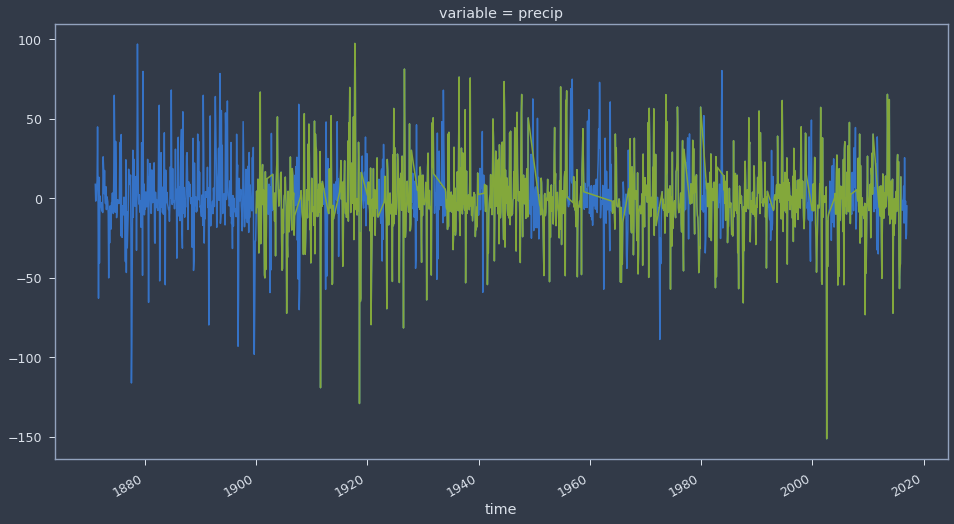

In [333]:
precip_anomfull.plot()
precip_anomtemp.plot()

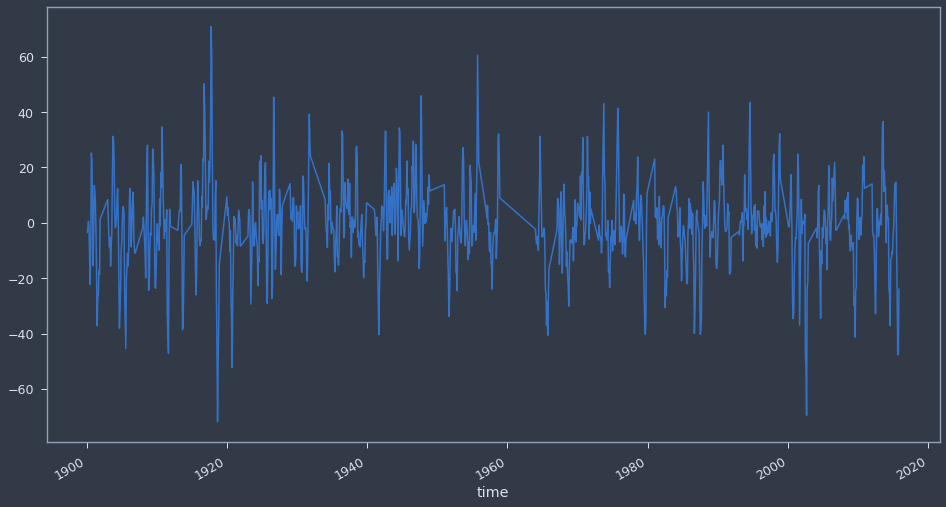

In [334]:
#Seasonal means of precip anomalies
precipa_seasonal = precip_anom.rolling(time=3,center=True).mean()
precipa_seasonal
precipa_seasonal.plot()

In [335]:
#Seasonal means of SSTA
ssta_seasonal = sst_anom.rolling(time=3,center=True).mean()
print(ssta_seasonal.dims)
print(sst_anom.dims)

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


('time', 'lat', 'lon')
('time', 'lat', 'lon')


#Test plot of seasonal SST anomalies in DJF 1997-8
plt.contourf(ssta_seasonal.sel(time='1998-01-01'))
plt.colorbar()

In [336]:
#There is no inbuilt xarray correlation function so I used Ryan Abernathey's functions from:
#https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html
#NANs will RUIN EVERYTHING. Drop all leading/trailing NaNs after making a seasonal mean.
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

# correlation starts here

In [337]:
#First, try correlation map with no lag. This should give us r ~= -0.5 in the Tropical Pacific.
x = ssta_seasonal[1:-1,:,:]
y = precipa_seasonal[1:-1]
sst_r = correlation(x, y, dims='time')
#y = ssta_seasonal.sel(lat=0,lon=270)[1:-1]
#dims = 'time'

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Contemporaneous Correlation Between SST and AIRI Anomalies (3-month running mean)')

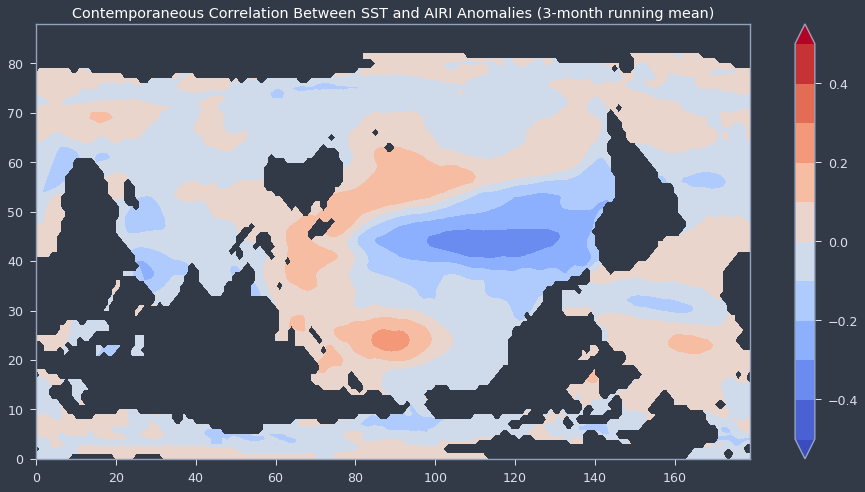

In [338]:
#Plot the result
lev = np.linspace(-.5, .5, 11, endpoint=True)
plt.contourf(sst_r,lev,cmap='coolwarm',extend='both')
plt.colorbar()
plt.title('Contemporaneous Correlation Between SST and AIRI Anomalies (3-month running mean)', color = 'white')

In [339]:
#Try the same with only JJA:
julys=np.arange(6,1056,12) #1752 instead of 1068
ssta_jja = ssta_seasonal[julys,:,:]
precipa_jja = precipa_seasonal[julys]
sst_jja_r = correlation(ssta_jja,precipa_jja,dims='time')

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Contemporaneous Correlation Between SST and AIRI Anomalies (JJA Mean)')

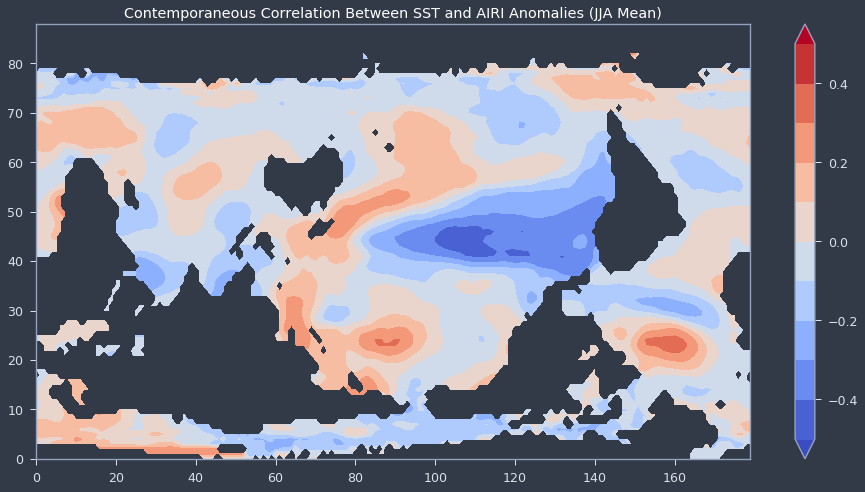

In [340]:
#Plot JJA correlation
lev = np.linspace(-.5, .5, 11, endpoint=True)
plt.contourf(sst_jja_r,lev,cmap='coolwarm',extend='both')
plt.colorbar()
plt.title('Contemporaneous Correlation Between SST and AIRI Anomalies (JJA Mean)', color = 'white')

In [341]:
#Try this with a lag of 3 months
ssta_seasonal_3shift = ssta_seasonal.shift(time=-3)
ssta_mam = ssta_seasonal_3shift[julys,:,:]

Text(0.5, 1.0, 'Green: Shifted SSTA (by 3 months)')

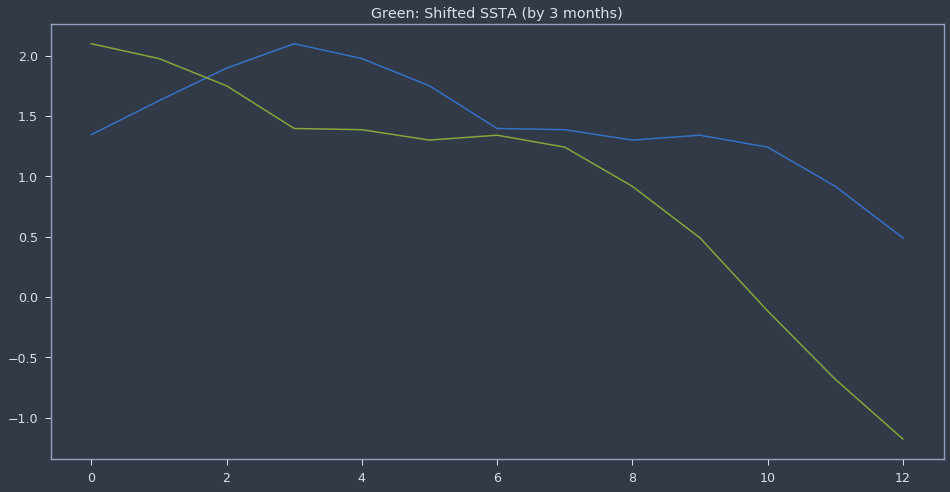

In [342]:
plt.plot(ssta_seasonal.sel(lon=270,lat=0,time=slice('1987-01-01','1988-01-01')))
plt.plot(ssta_seasonal_3shift.sel(lon=270,lat=0,time=slice('1987-01-01','1988-01-01')))
plt.title('Green: Shifted SSTA (by 3 months)')

In [343]:
#Run correlation
sst_mam_r = correlation(ssta_mam,precipa_jja,dims='time')

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Correlation Between MAM SST and JJA AIRI Anomalies')

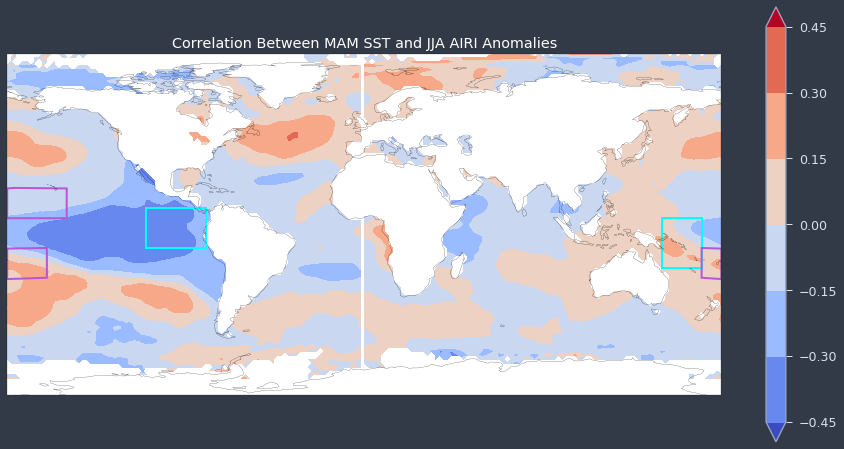

In [344]:
#Plot MAM/JJA correlation
ax = plt.axes(projection=ccrs.PlateCarree())
#lev = np.linspace(-.5, .5, 11, endpoint=True)
#plt.contourf(sst_mam_r,lev,cmap='coolwarm',extend='both')
#plt.colorbar()
sst_mam_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between MAM SST and JJA AIRI Anomalies', color = 'white')

In [345]:
#Try May-March tendency and jjas AIRI to be more consistent with Wang paper
ssta_2shift_dt = sst_anom-sst_anom.shift(time=2) #This has the May minus March value at the May index
precipa_4seasonal = precip_anom.rolling(time=4).mean() #This has the JJAS mean at the Sep index
septembers = np.arange(8,1056,12)
precipa_jjas = precipa_4seasonal[septembers]
ssta_2shift_dt_sep = ssta_2shift_dt.shift(time=4)[septembers,:,:]

In [346]:
sst_may_mar_r = correlation(ssta_2shift_dt_sep,precipa_jjas,dims='time')

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJAS AIRI Anomalies')

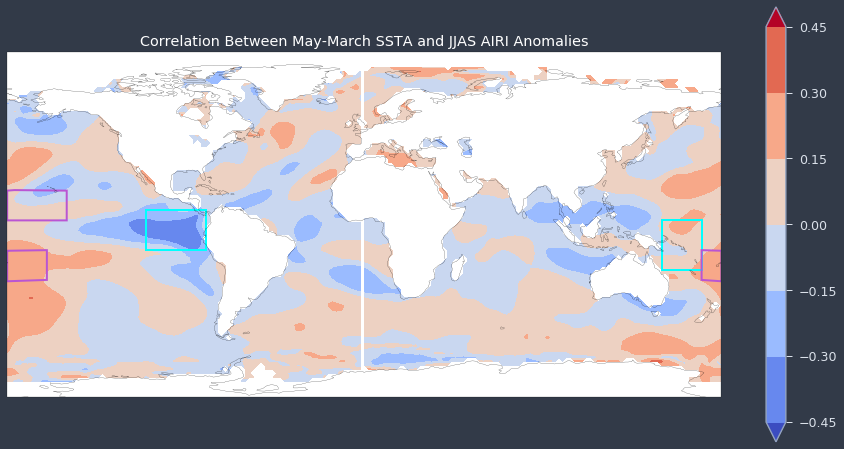

In [347]:
#Plot correlation
ax = plt.axes(projection=ccrs.PlateCarree())
#lev = np.linspace(-.5, .5, 11, endpoint=True)
#plt.contourf(sst_may_mar_r,lev,cmap='coolwarm',extend='both')
#plt.colorbar()
sst_may_mar_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between May-March SSTA and JJAS AIRI Anomalies', color = 'white')

#  DSST (20°S–5°N, 150°E-170°E)minus DSST (10°S–10°N, 110°W–80°W). EPT
# DSSTw(10°–25°S, 170°E–160°W)minus DSST (5°–20°N, 180°–150°W) CPT

# correlation part 2

In [348]:
#Try the same with only JJA:
march = np.arange(2,1056,12)
april = np.arange(3,1056,12)
may = np.arange(4,1056,12)

junes = np.arange(5,1056,12)
julys = np.arange(6,1056,12) #1752 instead of 1068
augusts = np.arange(7,1056, 12)
septembers = np.arange(8,1056,12)

ssta_march = sst_anom[march,:,:]
ssta_april = sst_anom[april,:,:]
ssta_may = sst_anom[may,:,:]

ssta_march.time.data = ssta_may.time.data
ssta_april.time.data = ssta_may.time.data

precipa_june = precip_anom[junes]
precipa_july = precip_anom[julys]
precipa_august = precip_anom[augusts]
precipa_september = precip_anom[septembers]

precipa_july.time.data = precipa_june.time.data
precipa_august.time.data = precipa_june.time.data
precipa_september.time.data = precipa_june.time.data

precipa_jjas = (precipa_june + precipa_july + precipa_august + precipa_september)

In [359]:
ssta_mam = ssta_march + ssta_april + ssta_may
ssta_may_mar = ssta_may - ssta_march
ssta_ma = ssta_march + ssta_april
ssta_am = ssta_april + ssta_may
ssta_may_apr = ssta_may - ssta_april
precipa_jjas.time.data = ssta_mam.time.data

In [360]:
# DSST (20°S–5°N, 150°E-170°E)minus DSST (10°S–10°N, 110°W–80°W). EPT
# DSSTw(10°–25°S, 170°E–160°W)minus DSST (5°–20°N, 180°–150°W) CPT

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Correlation Between MarchAprilMay SSTA and JJAS AIRI Anomalies')

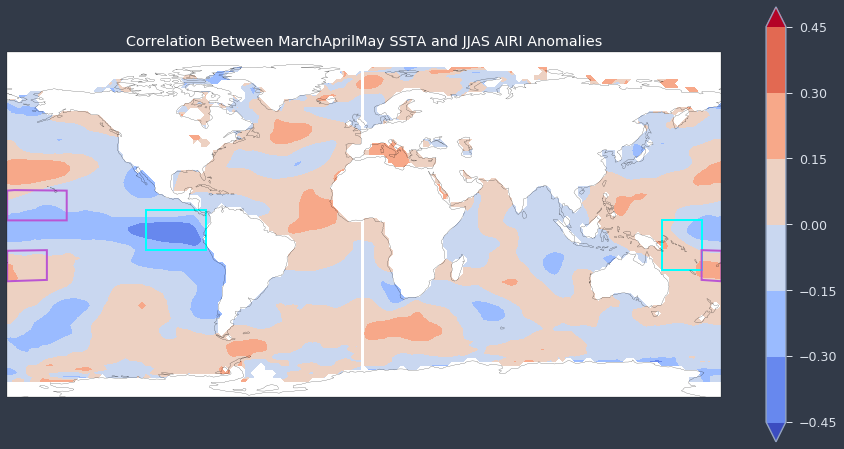

In [361]:
sst_mam_r = correlation(ssta_mam,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_mam_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between MarchAprilMay SSTA and JJAS AIRI Anomalies', color = 'white')

Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJAS AIRI Anomalies')

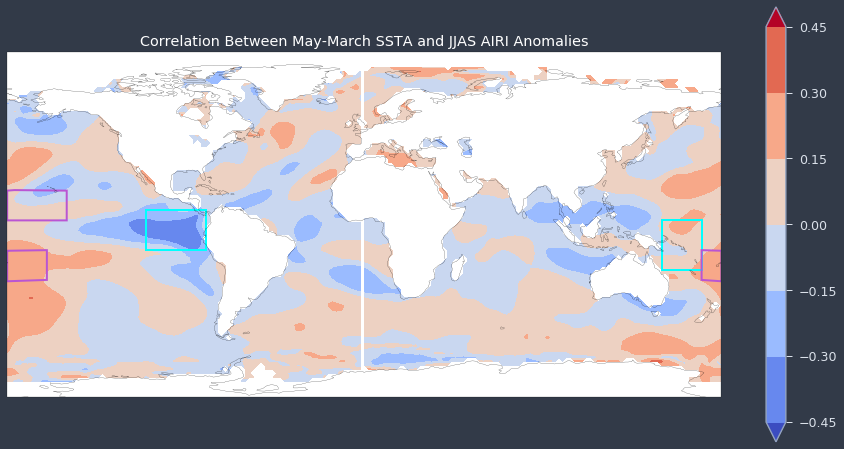

In [362]:
sst_may_mar_r = correlation(ssta_may_mar,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_mar_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between May-March SSTA and JJAS AIRI Anomalies', color = 'white')

Text(0.5, 1.0, 'Correlation Between MarchApril SSTA and JJAS AIRI Anomalies')

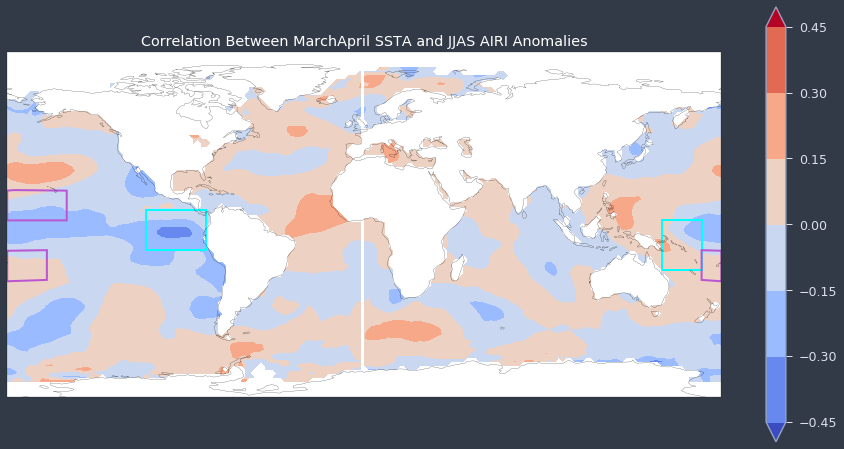

In [363]:
sst_ma_r = correlation(ssta_ma,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_ma_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between MarchApril SSTA and JJAS AIRI Anomalies', color = 'white')

Text(0.5, 1.0, 'Correlation Between AprilMay SSTA and JJAS AIRI Anomalies')

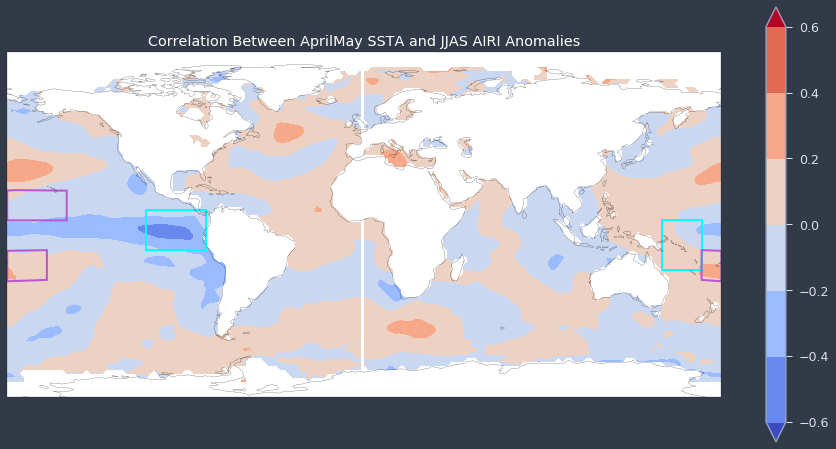

In [369]:
sst_am_r = correlation(ssta_am,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_am_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between AprilMay SSTA and JJAS AIRI Anomalies', color = 'white')

Text(0.5, 1.0, 'Correlation Between May-April SSTA and JJAS AIRI Anomalies')

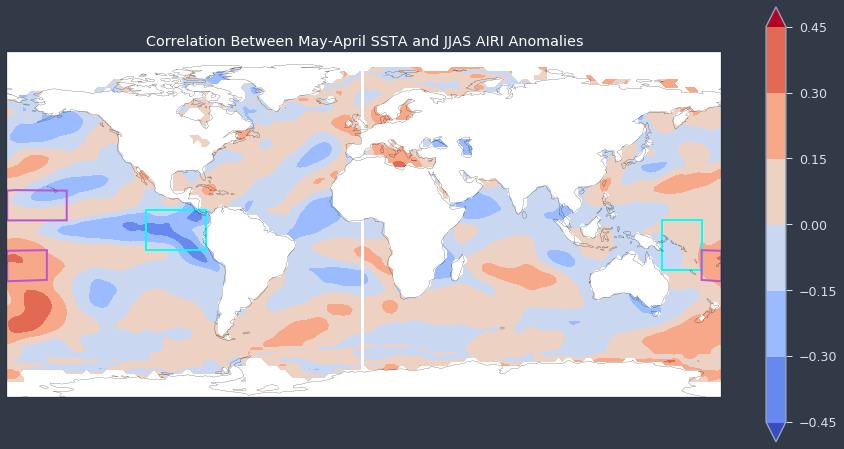

In [370]:
sst_may_apr_r = correlation(ssta_may_apr,precipa_jjas,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_may_apr_r.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between May-April SSTA and JJAS AIRI Anomalies', color = 'white')

In [371]:
# random plots
precipa_jja = (precipa_june + precipa_july + precipa_august)
precipa_jja.time.data = ssta_mam.time.data

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Text(0.5, 1.0, 'Correlation Between MarchAprilMay SSTA and JJA AIRI Anomalies')

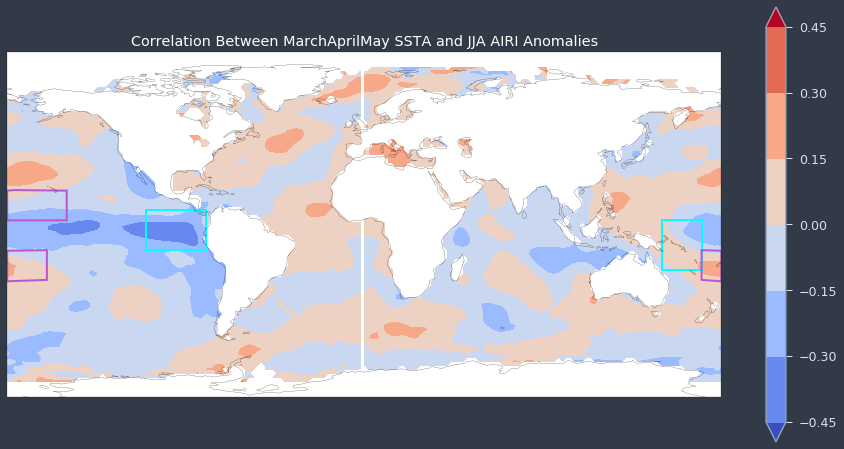

In [372]:
sst_mam_jja = correlation(ssta_mam,precipa_jja,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
sst_mam_jja.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between MarchAprilMay SSTA and JJA AIRI Anomalies', color = 'white')

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Correlation Between May-March SSTA and JJA AIRI Anomalies')

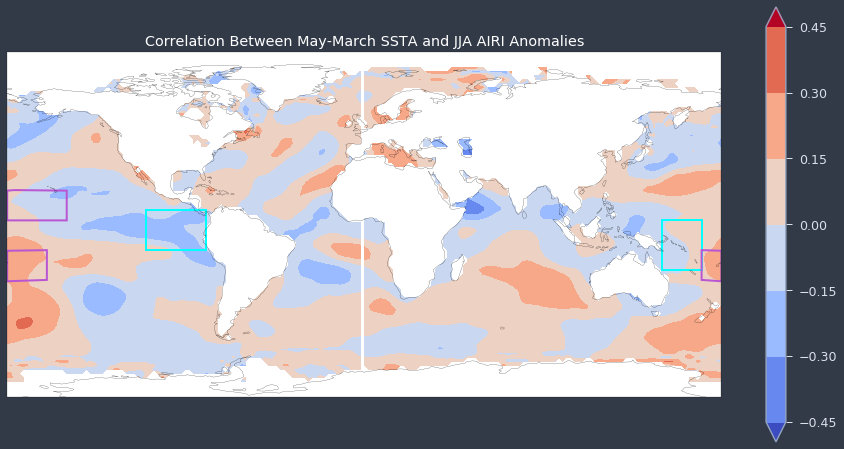

In [373]:
testing = correlation(ssta_may_apr,precipa_jja,dims='time')
ax = plt.axes(projection=ccrs.PlateCarree())
testing.plot.contourf(cmap='coolwarm', extend='both')
ax.coastlines()
ax.add_patch(mpatches.Rectangle(xy=[150,-20], width=20, height=25, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-110,-10], width=30, height=20, facecolor=None, edgecolor='aqua', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[170,-25], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
ax.add_patch(mpatches.Rectangle(xy=[-180,5], width=30, height=15, facecolor=None, edgecolor='mediumorchid', fill = False, linewidth = 2, transform=ccrs.Geodetic()))
plt.title('Correlation Between May-March SSTA and JJA AIRI Anomalies', color = 'white')

In [368]:
# Copyright (c) 2020 Medha Palavalli.